In [12]:
import os
import pandas as pd
import yaml

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
sns.set_theme()


In [13]:
root_dir = r".\results\2024Mar21-125206_configs"  

In [14]:
def collect_experiment_data(root_dir):
    """
    Collects experiment data and selected parameters from configuration files across multiple runs.
    
    Parameters:
    - root_dir: The root directory where experiment results are stored.
    
    Returns:
    - A pandas DataFrame containing the collected data and parameters.
    """
    all_data = []

    # Walk through the directory structure
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith("loss_record.csv"):
                # Path to the current file
                file_path = os.path.join(subdir, file)
                # Read the loss record CSV file
                df = pd.read_csv(file_path)
                
                # Load the corresponding cfg.yaml file to get parameters
                cfg_path = os.path.join(subdir, "cfg.yaml")
                with open(cfg_path, 'r') as cfg_file:
                    cfg_data = yaml.safe_load(cfg_file)
                
                # Extract needed parameters
                run_id = cfg_data.get('run_id')
                tau = cfg_data['tau']
                lower_bound_softmax = cfg_data['lower_bound_softmax']
                
                # Add parameters as new columns to the DataFrame
                df['run_id'] = run_id
                df['tau'] = tau
                df['lower_bound_softmax'] = lower_bound_softmax
                
                # Append to the list of all data
                all_data.append(df)

    # Concatenate all data into a single DataFrame
    return pd.concat(all_data, ignore_index=True)

combined_data = collect_experiment_data(root_dir)
combined_data

aggregated_df = combined_data.groupby(['run_id', 'tau', 'lower_bound_softmax']).agg({'epoch': 'max'}).reset_index()

aggregated_df

,run_id,tau,lower_bound_softmax,epoch
0,0,0.001,0.5,299
1,0,0.010,0.5,299
2,0,0.100,0.5,299
3,0,1.000,0.5,299
4,1,0.001,0.5,299
5,1,0.010,0.5,299
6,1,0.100,0.5,299
7,1,1.000,0.5,299
8,2,0.001,0.5,299
9,2,0.010,0.5,299


In [15]:
# plt.figure(figsize=(10, 6))
# # Assuming you want to plot the loss for the last epoch of each run, you can filter or aggregate the data as needed
# sns.lineplot(data=aggregated_df, x='tau', y='epoch', hue='lower_bound_softmax', palette='viridis', marker='o')
# plt.xlabel('Tau')
# plt.ylabel('Total Loss')
# plt.xscale('log')
# # plt.yscale('log')
# plt.title('Max Epoch vs. Tau for Each Epoch')
# plt.legend(title='Epoch', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [16]:
def collect_bellman_errors(root_dir):
    """
    Collects Bellman error values and selected parameters from configuration files across multiple runs.
    
    Parameters:
    - root_dir: The root directory where experiment results are stored.
    
    Returns:
    - A pandas DataFrame containing the collected Bellman errors and parameters.
    """
    all_errors = []

    # Walk through the directory structure
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file == "bellman_error.txt":
                # Path to the current file
                file_path = os.path.join(subdir, file)
                # Read the Bellman error value from the file
                with open(file_path, 'r') as error_file:
                    bellman_error = float(error_file.read().strip())
                
                # Load the corresponding cfg.yaml file to get parameters
                cfg_path = os.path.join(subdir, "cfg.yaml")
                with open(cfg_path, 'r') as cfg_file:
                    cfg_data = yaml.safe_load(cfg_file)
                
                # Extract needed parameters
                run_id = cfg_data.get('run_id')
                tau = cfg_data['tau']
                lower_bound_softmax = cfg_data['lower_bound_softmax']
                
                # Create a dictionary with the collected data
                error_data = {
                    'run_id': run_id,
                    'tau': tau,
                    'lower_bound_softmax': lower_bound_softmax,
                    'bellman_error': bellman_error
                }
                
                # Append to the list of all errors
                all_errors.append(error_data)

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(all_errors)

# Example usage
bellman_errors_df = collect_bellman_errors(root_dir)
bellman_errors_df["exp"] = "random_sampling"
bellman_errors_df

,run_id,tau,lower_bound_softmax,bellman_error,exp
0,0,0.001,0.5,0.051467,random_sampling
1,1,0.001,0.5,0.045379,random_sampling
2,2,0.001,0.5,0.039173,random_sampling
3,3,0.001,0.5,0.016552,random_sampling
4,4,0.001,0.5,0.052725,random_sampling
5,5,0.001,0.5,0.038744,random_sampling
6,6,0.001,0.5,0.060515,random_sampling
7,7,0.001,0.5,0.050819,random_sampling
8,8,0.001,0.5,0.053898,random_sampling
9,9,0.001,0.5,0.043573,random_sampling


In [17]:
grouped_mean_df = bellman_errors_df.groupby('tau')['bellman_error'].mean().reset_index()
grouped_mean_df

,tau,bellman_error
0,0.001,0.045284
1,0.010,0.051858
2,0.100,0.048210
3,1.000,0.050360


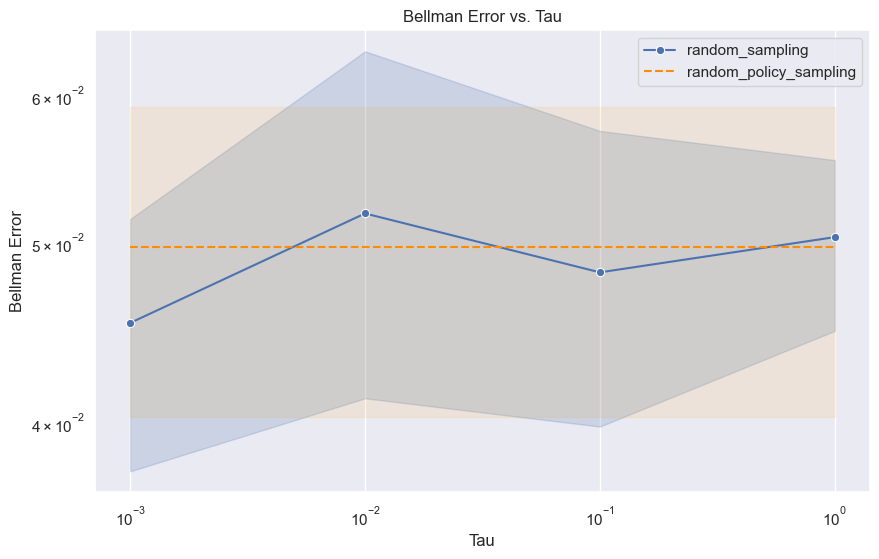

In [18]:
baseline_dir = r".\results\2024Mar21-151043_baseline_configs"  

# Example usage
baseline_bellman_errors_df = collect_bellman_errors(baseline_dir)

# unique_taus = bellman_errors_df['tau'].unique()

# expanded_rows = []
# for tau in unique_taus:
#     temp_df = baseline_bellman_errors_df.copy()  # Make a copy of the baseline dataframe
#     temp_df['tau'] = tau  # Set tau to the current unique value
#     expanded_rows.append(temp_df)  # Append the modified dataframe to the list

# # Combine all the expanded rows into a single dataframe
# df_baseline_expanded = pd.concat(expanded_rows).reset_index(drop=True)
# df_baseline_expanded["exp"] = "random_policy_sampling"
# df_baseline_expanded[:10]

baseline_avg_bellman_error = baseline_bellman_errors_df['bellman_error'].mean()
baseline_std_dev = baseline_bellman_errors_df['bellman_error'].std()

plt.figure(figsize=(10, 6))

# Plot experiment data
sns.lineplot(data=bellman_errors_df, x="tau", y="bellman_error", hue="exp", marker="o", errorbar="ci")

tau_min = bellman_errors_df['tau'].min()
tau_max = bellman_errors_df['tau'].max()

log_tau_min, log_tau_max = np.log10(tau_min), np.log10(tau_max)
plt.plot([10**log_tau_min, 10**log_tau_max], [baseline_avg_bellman_error, baseline_avg_bellman_error], linestyle='--', color='darkorange')

# Add standard deviation as a confidence interval around the baseline
plt.fill_between([tau_min, tau_max], 
                 [baseline_avg_bellman_error - baseline_std_dev]*2, 
                 [baseline_avg_bellman_error + baseline_std_dev]*2, 
                 color='orange', alpha=0.1, label='random_policy_sampling')

# Adjustments to plot aesthetics
plt.xlabel("Tau")
plt.ylabel("Bellman Error")
plt.xscale("log")
plt.yscale("log")
plt.title("Bellman Error vs. Tau")

# Get the current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Create a custom handle for the dark orange dotted line
custom_handle = Line2D([], [], color='darkorange', linestyle='--', label='random_policy_sampling')

# Replace the handle for 'random_policy_sampling' with the custom handle
# This assumes 'random_policy_sampling' is the last added label/handle. Adjust if needed.
new_handles = [h for h, l in zip(handles, labels) if l != 'random_policy_sampling'] + [custom_handle]
new_labels = [l for l in labels if l != 'random_policy_sampling'] + ['random_policy_sampling']

# Create the updated legend with the custom handle
plt.legend(new_handles, new_labels)

plt.show()

In [27]:
baseline_bellman_errors_df["tau"].unique()

array([0.01])

In [29]:
high_tau_df = bellman_errors_df[bellman_errors_df["tau"]==1]
high_tau_df['bellman_error'].mean()

0.05035959878285212

In [19]:
# # concat the 2 df
# bellman_errors_df = pd.concat([bellman_errors_df, df_baseline_expanded])
# bellman_errors_df

C:\Users\Chainsword\AppData\Local\Temp\ipykernel_20860\3323763683.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


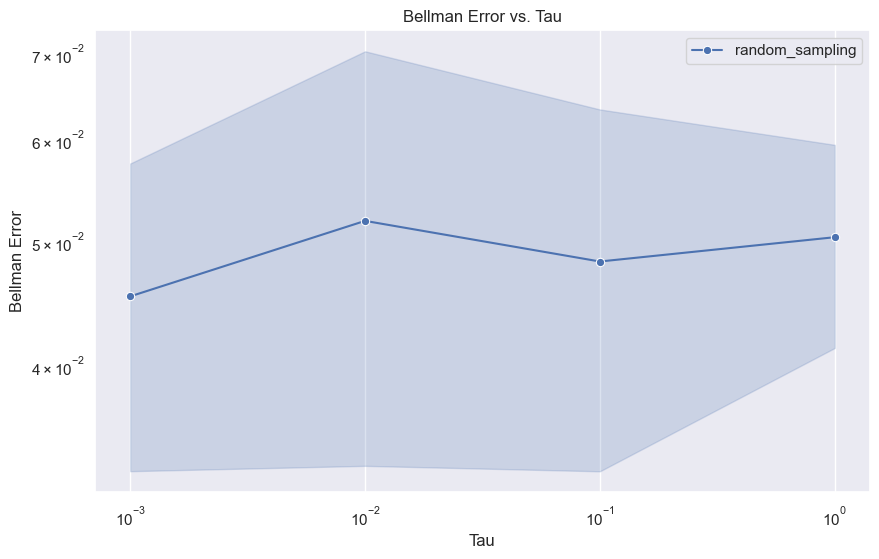

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=bellman_errors_df,
    x="tau",
    y="bellman_error",
    hue="exp",
    marker="o",
    # n_boot = 10000,
    ci="sd"
    # label="Bellman Error",
)
plt.xlabel("Tau")
plt.ylabel("Bellman Error")
plt.xscale("log")
plt.yscale("log")
plt.title("Bellman Error vs. Tau")
plt.legend()
plt.show()

In [21]:
#use mdp to generate transition distribution
# this generates another dataset of transitions

# then apply:
# ### Training
# input_size = len(states[0])  # Or another way to represent the size of your input
# output_size = len(actions)

# # Initialize the DQN
# dqn = DQN(input_size, output_size)

# loss_record = train_dqn(
#     dqn,
#     sampled_transitions_train,
#     Q_pi_random,
#     states,
#     actions,
#     gamma,
#     epsilon,
#     batch_size=batch_size,
#     max_iterations=train_max_iterations,
#     logger=logger,
# )

# bm_error = compute_bellmans_error(
#     dqn, validation_transitions=transitions_val, gamma=gamma
# )

### AND

# policy evaluation

# plot both

In [22]:
# do policy evaluation on train datasets -> Q 
# Evaluate with Q on validation set

# training DQN == value iteration
# we want to do policy evaluation with DQN (we do this by changing the loss function with bellman equation for Q pi instead of Q*)
# if we want to do early stopping, do it with Q* instead of Q pi random